<a href="https://colab.research.google.com/github/CamiloVga/Curso-IA-Aplicada/blob/main/Script_20_RNN_para_An%C3%A1lisis_de_Sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ü§ñ Inteligencia Artificial Aplicada para la Econom√≠a
## Universidad de los Andes

### üë®‚Äçüè´ Profesores
- **Profesor Magistral:** [Camilo Vega Barbosa](https://www.linkedin.com/in/camilovegabarbosa/)
- **Asistente de Docencia:** [Sergio Julian Zona Moreno](https://www.linkedin.com/in/sergiozonamoreno/)

### üìö An√°lisis de Sentimiento con RNN para Tweets Financieros
Este notebook implementa Redes Neuronales Recurrentes (RNN) para an√°lisis de sentimiento en tweets financieros, utilizando el dataset **TimKoornstra/financial-tweets-sentiment**:

1. **Preprocesamiento de Texto para Tweets Financieros üßπ**
   - Limpieza y normalizaci√≥n de tweets del sector financiero
   - Tokenizaci√≥n adaptada para texto de redes sociales
   - Manejo de vocabulario especializado en finanzas y mercados

2. **Arquitecturas RNN Avanzadas üß†**
   - Simple RNN: Fundamentos de procesamiento secuencial
   - LSTM: Manejo de dependencias a largo plazo
   - GRU: Optimizaci√≥n computacional con rendimiento comparable
   - Redes Bidireccionales: Captura de contexto completo

3. **Embeddings Sem√°nticos üî§**
   - Embeddings tradicionales vs. BERT
   - Transferencia de conocimiento desde modelos preentrenados
   - Representaci√≥n contextual de t√©rminos financieros y burs√°tiles

4. **Optimizaci√≥n de Hiperpar√°metros üìä**
   - Grid Search exhaustivo
   - Evaluaci√≥n comparativa de arquitecturas
   - M√©tricas especializadas para clasificaci√≥n de sentimiento
   - Visualizaci√≥n de resultados experimentales

In [1]:
#####################################################################
# SECCI√ìN 1: INSTALACI√ìN DE LIBRER√çAS Y CONFIGURACI√ìN INICIAL
#####################################################################

# Instalaci√≥n de paquetes necesarios
!pip install transformers datasets tensorflow nltk scikit-learn matplotlib pandas -q

# Importaciones principales organizadas por categor√≠a
# --- An√°lisis de datos y visualizaci√≥n ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Procesamiento de lenguaje natural ---
import re
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertModel

# --- Modelos de Deep Learning ---
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# --- Evaluaci√≥n de modelos ---
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# --- Otros utilitarios ---
from datasets import load_dataset
import time
import itertools

# Descarga recursos de NLTK necesarios
nltk.download('punkt', quiet=True)

# Configurar semilla aleatoria para reproducibilidad
# Esto asegura que los resultados sean consistentes en m√∫ltiples ejecuciones
np.random.seed(42)
tf.random.set_seed(42)



   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 487.4/487.4 kB 7.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183.9/183.9 kB 9.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 9.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 7.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 require

## Base de Datos y preprocesamiento


**Este bloque de c√≥digo** se encarga del preprocesamiento de la **base de datos TimKoornstra/financial-tweets-sentiment**, que contiene tweets clasificados seg√∫n su sentimiento sobre temas financieros: **positivo (1), negativo (2) o neutral (0)**.

La secci√≥n comienza cargando el dataset "**TimKoornstra/financial-tweets-sentiment**", que es una colecci√≥n integral de tweets enfocados en temas financieros, meticulosamente curada para an√°lisis de sentimiento en el dominio de finanzas y mercados burs√°tiles.

El c√≥digo realiza una **exploraci√≥n inicial de los datos**, verificando la distribuci√≥n de las clases en el dataset original: 17,368 sentimientos alcistas (bullish), 8,542 bajistas (bearish) y 12,181 neutrales.

A continuaci√≥n, aplica **t√©cnicas especializadas de preprocesamiento para tweets**: conversi√≥n a min√∫sculas, eliminaci√≥n de menciones (@usuario), enlaces, hashtags, caracteres especiales, y normalizaci√≥n de espacios. Tambi√©n realiza tokenizaci√≥n adaptada para el lenguaje t√≠pico de Twitter.

Los datos se dividen en **conjuntos de entrenamiento (80%) y prueba (20%)**, manteniendo la distribuci√≥n de las clases mediante estratificaci√≥n para asegurar representatividad en ambos conjuntos.

Finalmente, realiza la **tokenizaci√≥n de los textos** y carga un **modelo BERT preentrenado** para generar embeddings avanzados. Estos embeddings proporcionan **representaciones vectoriales ricas en contexto** para t√©rminos financieros espec√≠ficos, permitiendo que las redes neuronales recurrentes capturen mejor los matices del sentimiento expresado en los tweets sobre mercados financieros.


In [2]:
#####################################################################
# SECCI√ìN 2: PREPROCESAMIENTO DE LA BASE DE DATOS
#####################################################################

print("Cargando dataset de tweets financieros...")

try:
    # Cargamos el dataset TimKoornstra/financial-tweets-sentiment
    dataset = load_dataset("TimKoornstra/financial-tweets-sentiment",
                         split="train",
                         trust_remote_code=True)

    # Convertir a DataFrame
    df = pd.DataFrame(dataset)

    # Verificamos las columnas del dataset
    print(f"Columnas en el dataset: {df.columns.tolist()}")

    # Renombramos columnas para coincidir con el dataset real (nombres en min√∫sculas)
    if 'tweet' in df.columns:
        df.rename(columns={'tweet': 'text'}, inplace=True)
    if 'sentiment' in df.columns:
        df.rename(columns={'sentiment': 'label'}, inplace=True)

    # Limitamos a una muestra estratificada
    # Verificar distribuci√≥n original
    class_distribution = df['label'].value_counts()
    print("\nDistribuci√≥n original de clases:")
    print(class_distribution)

    # Muestreo estratificado asegurando m√≠nimo 2 muestras por clase
    sample_size = min(3333, class_distribution.min())  # Ajustar seg√∫n disponibilidad
    df = df.groupby('label', group_keys=False).apply(
        lambda x: x.sample(n=max(2, min(len(x), sample_size)), random_state=42)  # M√≠nimo 2 muestras por clase
    ).reset_index(drop=True)

    # Verificar nueva distribuci√≥n
    new_class_distribution = df['label'].value_counts()
    print("\nDistribuci√≥n despu√©s del muestreo:")
    print(new_class_distribution)

    # Validaci√≥n cr√≠tica: cada clase debe tener al menos 2 muestras
    if (new_class_distribution < 2).any():
        raise ValueError(f"Clase con menos de 2 muestras: {new_class_distribution}")

except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("Creando datos de ejemplo como √∫ltimo recurso...")
    # Datos m√≠nimos de ejemplo mejorados
    texts = [
        "$AAPL looking bullish today, great earnings report!",
        "$TSLA down 5% after disappointing delivery numbers",
        "Markets steady as Fed maintains current policy stance",
        "Positive outlook for $GOOGL after AI conference",
        "$AMZN faces regulatory challenges in EU markets",
        "Oil prices volatile amid Middle East tensions"
    ]
    labels = [1, 2, 0, 1, 2, 0]  # Duplicamos muestras por clase
    df = pd.DataFrame({"text": texts, "label": labels})

# Exploraci√≥n b√°sica del dataset
print("\nInformaci√≥n del dataset:")
print(f"N√∫mero de ejemplos: {len(df)}")
print(f"Distribuci√≥n de clases: {df['label'].value_counts().to_dict()}")

# Validaci√≥n final para train_test_split
class_dist = df['label'].value_counts()
if (class_dist < 2).any():
    raise ValueError(f"No hay suficientes muestras para divisi√≥n estratificada. Distribuci√≥n: {class_dist}")

print("\nPrimeras filas del dataset:")
print(df.head())

# Preprocesamiento de texto especializado para tweets financieros
print("\nPreparando los datos...")

def preprocess_tweet(text):
    """
    Funci√≥n especializada para preprocesar tweets financieros
    - Elimina menciones, URLs, hashtags
    - Preserva s√≠mbolos de empresas ($AAPL, $MSFT, etc.)
    - Normaliza el texto
    """
    # Verificar tipo de dato
    if not isinstance(text, str):
        text = str(text)

    # Convertir a min√∫sculas
    text = text.lower()

    # Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Eliminar menciones (@usuario)
    text = re.sub(r'@\w+', '', text)

    # Preservar s√≠mbolos de acciones ($AAPL)
    stock_symbols = re.findall(r'\$[A-Za-z]+', text)

    # Eliminar caracteres especiales pero mantener letras, n√∫meros y espacios
    text = re.sub(r'[^a-zA-Z0-9\s\$]', ' ', text)  # Mantener s√≠mbolos de d√≥lar

    # Reintroducir los s√≠mbolos de acciones
    for symbol in stock_symbols:
        text = text + ' ' + symbol.lower()

    # Eliminar espacios m√∫ltiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Aplicar preprocesamiento
df['processed_text'] = df['text'].apply(preprocess_tweet)

# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

print(f"\nTama√±o conjunto entrenamiento: {len(X_train)}")
print(f"Tama√±o conjunto prueba: {len(X_test)}")

# Tokenizaci√≥n usando TensorFlow
print("\nTokenizando textos...")

# Par√°metros de tokenizaci√≥n
max_words = 15000  # Aumentamos el vocabulario para capturar t√©rminos financieros
max_len = 50       # Longitud m√°xima ajustada para tweets (t√≠picamente cortos)

# El tokenizador convierte palabras en n√∫meros (√≠ndices)
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')  # OOV = Out Of Vocabulary
tokenizer.fit_on_texts(X_train)  # Aprende el vocabulario del conjunto de entrenamiento

# Convertir textos a secuencias de √≠ndices
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding: hacer que todas las secuencias tengan la misma longitud
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Tama√±o real del vocabulario (limitado por max_words)
vocab_size = min(max_words, len(tokenizer.word_index)) + 1
print(f"Tama√±o del vocabulario: {vocab_size} palabras √∫nicas")

# Cargar BERT para embeddings
print("\nCargando modelo BERT para embeddings...")

# Usamos el modelo BERT base, que tiene buen rendimiento para ingl√©s general
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def get_bert_embeddings(tokenizer, bert_tokenizer, bert_model, vocab_size=15000, embedding_dim=768):
    print("Generando embeddings BERT para el vocabulario financiero...")
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    # Limitamos a las 300 palabras m√°s frecuentes para ahorrar tiempo
    # En un escenario real, se procesar√≠a todo el vocabulario
    words = []
    for word, idx in tokenizer.word_index.items():
        if idx < 300:  # Aumentamos el n√∫mero de palabras para capturar m√°s t√©rminos financieros
            words.append(word)

    # Calcular embeddings para cada palabra
    for word in words:
        idx = tokenizer.word_index[word]
        if idx >= vocab_size:
            continue

        # Tokenizar la palabra con BERT
        bert_tokens = bert_tokenizer(word, return_tensors='tf')

        # Obtener salida del modelo BERT
        outputs = bert_model(bert_tokens)

        # Usar la representaci√≥n del token
        word_embedding = outputs.last_hidden_state.numpy()[:, 1, :]
        embedding_matrix[idx] = word_embedding

    print(f"Embeddings BERT generados para {len(words)} palabras")
    return embedding_matrix

# Obtener matriz de embeddings BERT
bert_embedding_matrix = get_bert_embeddings(
    tokenizer,
    bert_tokenizer,
    bert_model,
    vocab_size=vocab_size
)

Cargando dataset de tweets financieros...


README.md:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/38091 [00:00<?, ? examples/s]

Columnas en el dataset: ['tweet', 'sentiment', 'url']

Distribuci√≥n original de clases:
label
1    17368
0    12181
2     8542
Name: count, dtype: int64

Distribuci√≥n despu√©s del muestreo:
label
0    3333
1    3333
2    3333
Name: count, dtype: int64

Informaci√≥n del dataset:
N√∫mero de ejemplos: 9999
Distribuci√≥n de clases: {0: 3333, 1: 3333, 2: 3333}

Primeras filas del dataset:
                                                text  label  \
0  Edited Transcript of MFA earnings conference c...      0   
1  German Federal President Steinmeier today awar...      0   
2  Coronavirus Threat Looms Over Fragile African ...      0   
3  $TTCM #NFT https://t.co/ncmCLAbNi9 https://t.c...      0   
4  $FLOW $APO - Apollo near deal to buy SPX Flow ...      0   

                                                 url  
0  https://huggingface.co/datasets/zeroshot/twitt...  
1  https://huggingface.co/datasets/zeroshot/twitt...  
2  https://huggingface.co/datasets/zeroshot/twitt...  
3  https://w

<ipython-input-2-1a599e9363d9>:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('label', group_keys=False).apply(



Tama√±o conjunto entrenamiento: 7999
Tama√±o conjunto prueba: 2000

Tokenizando textos...
Tama√±o del vocabulario: 15001 palabras √∫nicas

Cargando modelo BERT para embeddings...


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Generando embeddings BERT para el vocabulario financiero...
Embeddings BERT generados para 299 palabras



=== MUESTRA DE DATOS LIMPIOS ===
Texto original vs. Texto procesado:


text  \
5344  $AXS #AXS \n\nü§ë %15 PROFIT ü§ë\n\nListeners Win ...   
7444  @GerberKawasaki @PeteButtigieg You‚Äôre turning ...   
1731  ÔøΩÔøΩYes! We have no bananas.üé∂ Watch the full vid...   
8719  AMZN- Bearish set up ahead of earnings. TCT me...   
4521  XX - Cheap name but ready to clear this bull f...   

                                         processed_text  label  
5344  $axs axs 15 profit listeners win dinleyenler k...      1  
7444  you re turning this tragedy into a commercial ...      2  
1731  yes we have no bananas watch the full video an...      0  
8719  amzn bearish set up ahead of earnings tct memb...      2  
4521  xx cheap name but ready to clear this bull fla...      1

<ipython-input-3-13123c634e01>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


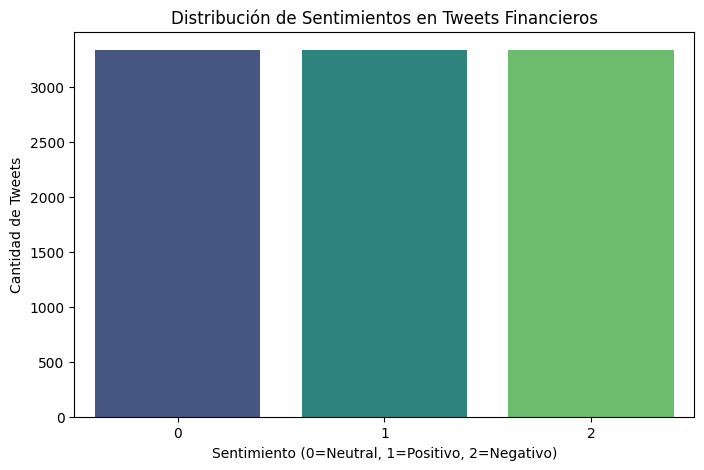


=== VISUALIZACI√ìN DE EMBEDDINGS ===
Usando embeddings BERT para visualizaci√≥n...
Aplicando reducci√≥n dimensional a 50 embeddings...


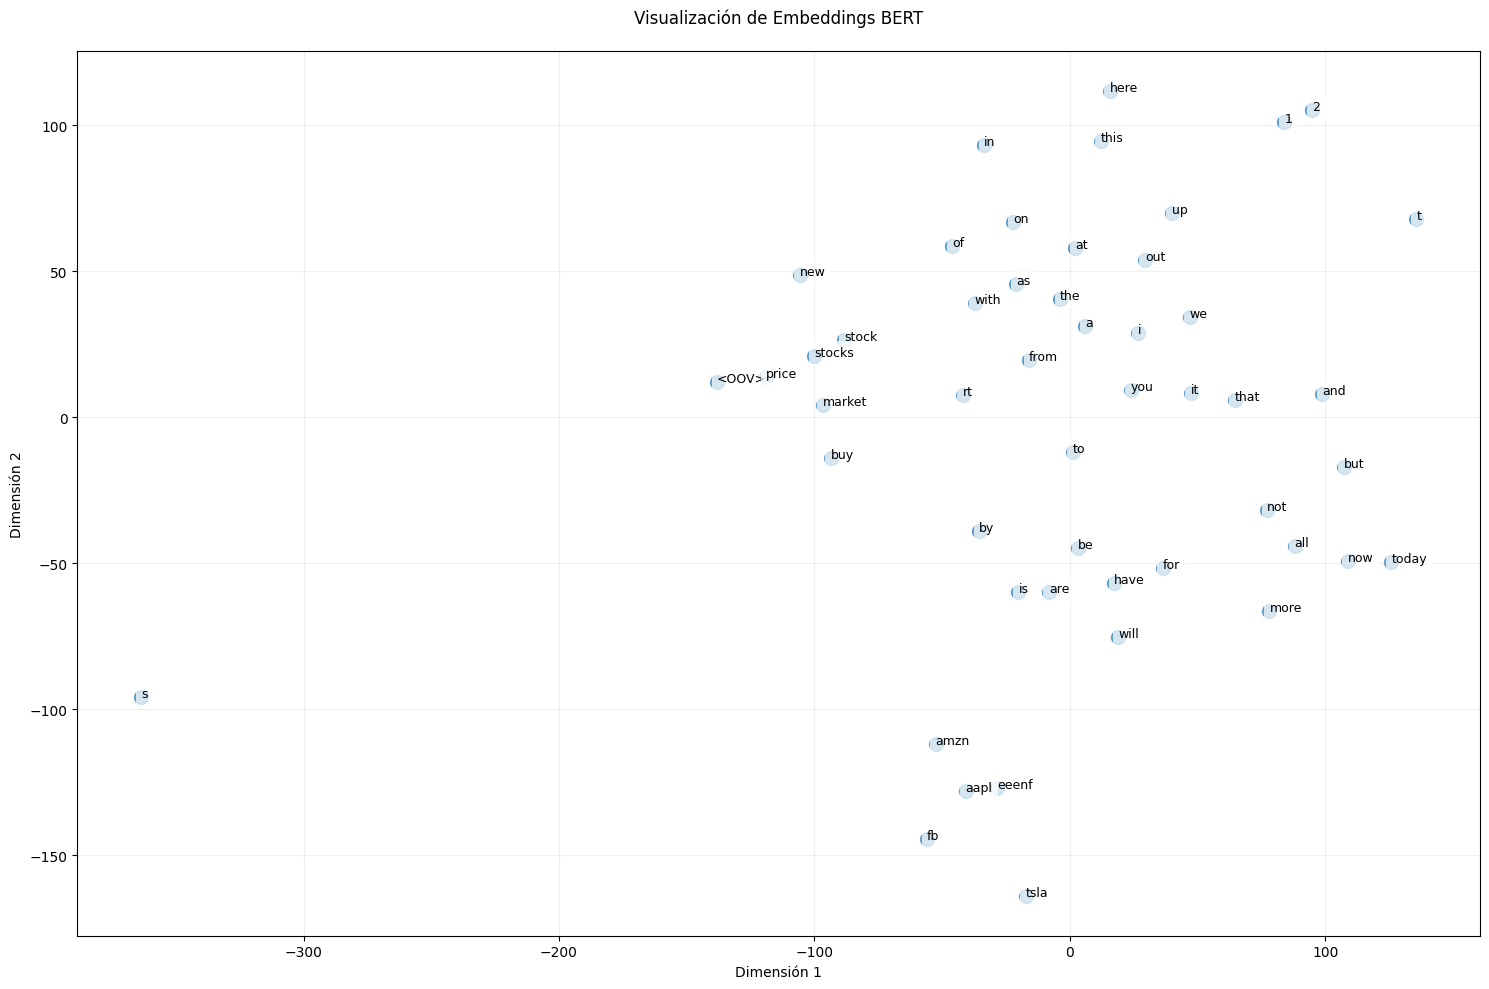


=== VISUALIZACI√ìN DE T√âRMINOS FINANCIEROS ===
Visualizando 30 t√©rminos financieros...


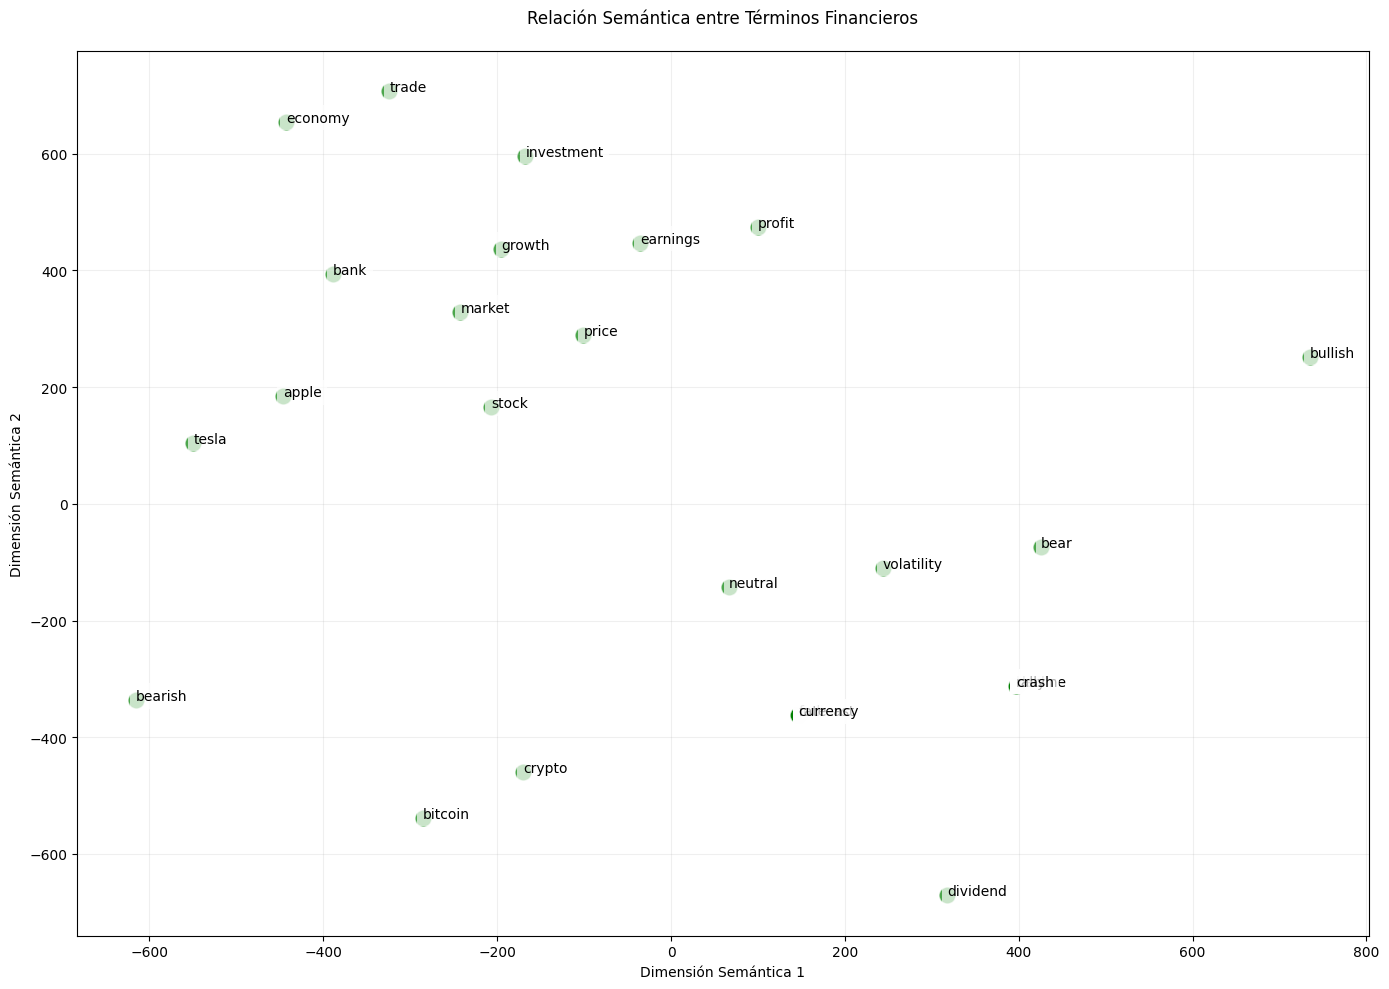

In [3]:
#####################################################################
# BLOQUE ADICIONAL: VISUALIZACI√ìN CORREGIDA DE EMBEDDINGS
#####################################################################

# 1. Visualizaci√≥n de muestra de datos limpios
print("\n=== MUESTRA DE DATOS LIMPIOS ===")
print("Texto original vs. Texto procesado:")
sample_df = df.sample(5, random_state=42)[['text', 'processed_text', 'label']]
display(sample_df)

# 2. Visualizaci√≥n de distribuci√≥n de clases
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribuci√≥n de Sentimientos en Tweets Financieros')
plt.xlabel('Sentimiento (0=Neutral, 1=Positivo, 2=Negativo)')
plt.ylabel('Cantidad de Tweets')
plt.show()

# 3. Visualizaci√≥n mejorada de embeddings con manejo de errores
print("\n=== VISUALIZACI√ìN DE EMBEDDINGS ===")

def safe_tsne(embeddings, n_components=2, perplexity=5, random_state=42):
    """Funci√≥n segura para aplicar t-SNE con par√°metros autom√°ticos"""
    from sklearn.manifold import TSNE
    n_samples = embeddings.shape[0]

    # Ajustar perplexity autom√°ticamente si es necesario
    safe_perplexity = min(perplexity, n_samples - 1) if n_samples > 1 else 1

    try:
        tsne = TSNE(n_components=n_components,
                   perplexity=safe_perplexity,
                   random_state=random_state)
        return tsne.fit_transform(embeddings)
    except Exception as e:
        print(f"Error en t-SNE: {e}. Usando PCA como alternativa...")
        from sklearn.decomposition import PCA
        pca = PCA(n_components=n_components)
        return pca.fit_transform(embeddings)

# Configuraci√≥n
num_words_to_plot = min(50, len(tokenizer.word_index))  # M√°ximo 50 palabras

# Obtener palabras m√°s frecuentes
top_words = [word for word, _ in sorted(tokenizer.word_index.items(), key=lambda x: x[1])][:num_words_to_plot]

# Verificar embeddings disponibles
use_bert = 'bert_embedding_matrix' in locals()
embedding_source = "BERT" if use_bert else "tradicionales"
print(f"Usando embeddings {embedding_source} para visualizaci√≥n...")

# Obtener embeddings
word_embeddings = {}
for word in top_words:
    try:
        if use_bert:
            if word in tokenizer.word_index and tokenizer.word_index[word] < len(bert_embedding_matrix):
                word_embeddings[word] = bert_embedding_matrix[tokenizer.word_index[word]]
        else:
            # Crear embedding dummy basado en frecuencia si no hay BERT
            word_embeddings[word] = np.array([tokenizer.word_index[word]])
    except Exception as e:
        print(f"Error obteniendo embedding para '{word}': {e}")

if not word_embeddings:
    print("No se encontraron embeddings v√°lidos. Creando datos de ejemplo...")
    word_embeddings = {f"word_{i}": np.random.rand(10) for i in range(num_words_to_plot)}

# Convertir a matriz
words = list(word_embeddings.keys())
embeddings = np.array(list(word_embeddings.values()))

# Asegurar dimensionalidad m√≠nima
if embeddings.ndim == 1:
    embeddings = embeddings.reshape(-1, 1)
if embeddings.shape[1] < 2:
    embeddings = np.hstack([embeddings, np.zeros((embeddings.shape[0], 2 - embeddings.shape[1]))])

# Reducci√≥n dimensional segura
print(f"Aplicando reducci√≥n dimensional a {len(embeddings)} embeddings...")
embeddings_2d = safe_tsne(embeddings) if len(embeddings) > 1 else embeddings[:, :2]

# Visualizaci√≥n
plt.figure(figsize=(15, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6, s=100)

# A√±adir etiquetas
for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title(f'Visualizaci√≥n de Embeddings {embedding_source}', pad=20)
plt.xlabel('Dimensi√≥n 1')
plt.ylabel('Dimensi√≥n 2')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# 4. Visualizaci√≥n especial para t√©rminos financieros (solo si hay suficientes datos)
if use_bert and len(word_embeddings) > 3:
    print("\n=== VISUALIZACI√ìN DE T√âRMINOS FINANCIEROS ===")

    finance_terms = ['bull', 'bear', 'market', 'price', 'stock', 'earnings',
                    'dollar', 'investment', 'profit', 'loss', 'apple', 'tesla',
                    'growth', 'decline', 'rally', 'crash', 'dividend', 'volatility',
                    'bullish', 'bearish', 'neutral', 'forecast', 'economy', 'trade',
                    'bank', 'fed', 'rate', 'currency', 'crypto', 'bitcoin']

    # Filtrar t√©rminos existentes
    valid_terms = [term for term in finance_terms
                  if term in word_embeddings or
                  (term in tokenizer.word_index and tokenizer.word_index[term] < len(bert_embedding_matrix))]

    if len(valid_terms) > 3:  # Necesitamos al menos 4 t√©rminos para t-SNE
        print(f"Visualizando {len(valid_terms)} t√©rminos financieros...")

        # Obtener embeddings
        term_embeddings = []
        valid_words = []
        for term in valid_terms:
            try:
                if term in word_embeddings:
                    term_embeddings.append(word_embeddings[term])
                    valid_words.append(term)
                elif term in tokenizer.word_index and tokenizer.word_index[term] < len(bert_embedding_matrix):
                    term_embeddings.append(bert_embedding_matrix[tokenizer.word_index[term]])
                    valid_words.append(term)
            except:
                continue

        term_embeddings = np.array(term_embeddings)

        # Reducci√≥n dimensional segura
        term_embeddings_2d = safe_tsne(term_embeddings) if len(term_embeddings) > 3 else term_embeddings[:, :2]

        # Visualizaci√≥n
        plt.figure(figsize=(14, 10))
        plt.scatter(term_embeddings_2d[:, 0], term_embeddings_2d[:, 1],
                   c='green', alpha=0.7, s=150, edgecolor='w')

        for i, term in enumerate(valid_words):
            plt.annotate(term, (term_embeddings_2d[i, 0], term_embeddings_2d[i, 1]),
                        fontsize=10,
                        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

        plt.title('Relaci√≥n Sem√°ntica entre T√©rminos Financieros', pad=20)
        plt.xlabel('Dimensi√≥n Sem√°ntica 1')
        plt.ylabel('Dimensi√≥n Sem√°ntica 2')
        plt.grid(alpha=0.2)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Solo {len(valid_terms)} t√©rminos financieros encontrados (se necesitan al menos 4 para visualizaci√≥n)")
else:
    print("No hay suficientes datos para visualizaci√≥n especializada de t√©rminos financieros")

## Entrenamiento de diferentes RNN para an√°lisis de sentimiento


**Esta secci√≥n del c√≥digo** implementa y eval√∫a diferentes arquitecturas de **Redes Neuronales Recurrentes (RNN)** para la clasificaci√≥n de sentimiento en tweets financieros.

El proceso comienza definiendo una **funci√≥n flexible para crear modelos RNN** que permite experimentar con distintas configuraciones: **SimpleRNN b√°sicas, LSTM con memoria de largo plazo, o GRU m√°s eficientes computacionalmente**. La funci√≥n tambi√©n incorpora opciones para utilizar **capas bidireccionales** (que procesan el texto en ambas direcciones) y elegir entre **embeddings tradicionales o pre-entrenados de BERT**.

El n√∫cleo de esta secci√≥n es la implementaci√≥n de un exhaustivo **Grid Search**, una t√©cnica de optimizaci√≥n que prueba sistem√°ticamente **24 combinaciones diferentes de hiperpar√°metros** (3 tipos de RNN √ó 2 opciones de bidireccionalidad √ó 2 tama√±os de unidades √ó 2 tasas de aprendizaje), tanto con embeddings tradicionales como con BERT, resultando en **48 modelos evaluados en total**.

Para cada modelo, se registran m√©tricas clave como **accuracy, F1-score y tiempo de ejecuci√≥n**. El c√≥digo implementa **early stopping** para evitar sobreajuste, deteniendo el entrenamiento cuando el rendimiento deja de mejorar en el conjunto de validaci√≥n.

Finalmente, todos los resultados se combinan, ordenan por precisi√≥n, y se presentan los **5 mejores modelos** con sus configuraciones detalladas, proporcionando una visi√≥n clara de qu√© arquitecturas y par√°metros ofrecen mejor rendimiento para la clasificaci√≥n de sentimiento en tweets del √°mbito financiero.





In [4]:

#####################################################################
# SECCI√ìN 3: IMPLEMENTACI√ìN Y EVALUACI√ìN DE MODELOS RNN
#####################################################################

print("\nPreparando Grid Search para RNN...")

# Determinar n√∫mero de clases para la capa de salida
num_classes = len(df['label'].unique())
print(f"N√∫mero de clases a predecir: {num_classes}")

# Funci√≥n para crear diferentes modelos RNN
def create_rnn_model(model_type='lstm', bidirectional=False, units=64,
                   learning_rate=0.001, dropout_rate=0.3, use_bert=False):
    """
    Crea un modelo RNN con diferentes configuraciones

    Args:
        model_type: Tipo de celda recurrente ('simple_rnn', 'lstm', 'gru')
        bidirectional: Si usar capa bidireccional
        units: N√∫mero de unidades en la capa recurrente
        learning_rate: Tasa de aprendizaje
        dropout_rate: Tasa de dropout
        use_bert: Si usar embeddings BERT pre-entrenados
    """
    # Input layer - recibe secuencias de √≠ndices
    inp = Input(shape=(max_len,))

    # Embedding layer - convierte √≠ndices en vectores densos
    if use_bert:
        # Usar embeddings BERT (enfoque de transfer learning)
        x = Embedding(
            input_dim=vocab_size,
            output_dim=bert_embedding_matrix.shape[1],
            weights=[bert_embedding_matrix],
            input_length=max_len,
            trainable=False  # No se actualizan durante el entrenamiento
        )(inp)
    else:
        # Embedding tradicional (se aprende durante el entrenamiento)
        x = Embedding(
            input_dim=vocab_size,
            output_dim=128,  # Dimensionalidad del embedding (hiperpar√°metro)
            input_length=max_len
        )(inp)

    # Seleccionar tipo de capa recurrente
    # NOTA PARA ESTUDIANTES: Cada tipo tiene caracter√≠sticas diferentes:
    # - SimpleRNN: La m√°s b√°sica, problemas con dependencias largas
    # - LSTM: Mejor memoria de largo plazo, m√°s par√°metros
    # - GRU: Similar a LSTM pero m√°s eficiente computacionalmente
    if model_type == 'simple_rnn':
        rnn_layer = SimpleRNN(units, return_sequences=True)
    elif model_type == 'lstm':
        rnn_layer = LSTM(units, return_sequences=True)
    else:  # gru
        rnn_layer = GRU(units, return_sequences=True)

    # Aplicar capa recurrente
    if bidirectional:
        x = Bidirectional(rnn_layer)(x)
    else:
        x = rnn_layer(x)

    # Global Pooling - colapsa la secuencia a un vector fijo
    x = GlobalMaxPooling1D()(x)

    # Dropout - t√©cnica de regularizaci√≥n para evitar sobreajuste
    x = Dropout(dropout_rate)(x)

    # Capa de salida - softmax para clasificaci√≥n multiclase
    out = Dense(num_classes, activation='softmax')(x)

    # Compilar modelo
    model = Model(inputs=inp, outputs=out)
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',  # Para etiquetas enteras (no one-hot)
        metrics=['accuracy']
    )

    return model

# Definir par√°metros para el grid search
param_grid = {
    'model_type': ['lstm', 'gru'],           # Tipo de RNN
    'bidirectional': [False, True],                         # Usar o no capa bidireccional
    'units': [32, 64],                                      # N√∫mero de unidades (neuronas)
    'learning_rate': [0.001, 0.0001],                       # Tasa de aprendizaje
    'batch_size': [32],                                     # Tama√±o del lote
    'epochs': [10]                                           # √âpocas de entrenamiento
}

# Funci√≥n para realizar grid search
def run_grid_search(param_grid, X_train, y_train, X_val, y_val, use_bert=False):
    """
    Realiza grid search sobre los hiperpar√°metros
    """
    # Generar todas las combinaciones posibles de hiperpar√°metros
    keys = param_grid.keys()
    combinations = list(itertools.product(*param_grid.values()))
    param_combinations = [dict(zip(keys, combo)) for combo in combinations]

    # Lista para almacenar resultados
    results = []

    print(f"Probando {len(param_combinations)} combinaciones de modelos...")

    # Probar cada combinaci√≥n
    for i, params in enumerate(param_combinations):
        start_time = time.time()

        # Extraer par√°metros
        model_type = params['model_type']
        bidirectional = params['bidirectional']
        units = params['units']
        learning_rate = params['learning_rate']
        batch_size = params['batch_size']
        epochs = params['epochs']

        # Crear nombre descriptivo para el modelo
        model_name = f"{model_type.upper()}"
        if bidirectional:
            model_name = f"Bi{model_name}"
        model_name += f"_u{units}_lr{learning_rate}"
        if use_bert:
            model_name += "_BERT"

        print(f"\n[{i+1}/{len(param_combinations)}] Entrenando {model_name}...")

        # Crear modelo con los par√°metros actuales
        model = create_rnn_model(
            model_type=model_type,
            bidirectional=bidirectional,
            units=units,
            learning_rate=learning_rate,
            dropout_rate=0.3,  # Fijo para simplificar
            use_bert=use_bert
        )

        # Early stopping - detiene el entrenamiento cuando deja de mejorar
        early_stopping = EarlyStopping(
            monitor='val_accuracy',
            patience=2,  # N√∫mero de √©pocas sin mejora antes de detenerse
            restore_best_weights=True  # Restaura los mejores pesos encontrados
        )

        # Entrenar modelo
        history = model.fit(
            X_train,
            y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

        # Evaluar modelo en conjunto de validaci√≥n
        y_pred_probs = model.predict(X_val)
        y_pred = np.argmax(y_pred_probs, axis=1)

        # Calcular m√©tricas de rendimiento
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Tiempo de ejecuci√≥n
        execution_time = time.time() - start_time

        # Guardar resultados
        result = {
            'model_name': model_name,
            'model_type': model_type,
            'bidirectional': bidirectional,
            'units': units,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'accuracy': accuracy,
            'f1_score': f1,
            'execution_time': execution_time,
            'use_bert': use_bert
        }

        results.append(result)

        print(f"Resultado: Acc={accuracy:.4f}, F1={f1:.4f}, Tiempo={execution_time:.1f}s")

    # Ordenar resultados por precisi√≥n (de mayor a menor)
    results_sorted = sorted(results, key=lambda x: x['accuracy'], reverse=True)

    return results_sorted

# Ejecutar grid search con embeddings tradicionales
print("\nEjecutando grid search con embeddings tradicionales...")
results_traditional = run_grid_search(
    param_grid,
    X_train_pad,
    y_train,
    X_test_pad,
    y_test,
    use_bert=False
)

# Ejecutar grid search con BERT embeddings
print("\nEjecutando grid search con embeddings BERT...")
results_bert = run_grid_search(
    param_grid,
    X_train_pad,
    y_train,
    X_test_pad,
    y_test,
    use_bert=True
)

# Combinar y ordenar todos los resultados
all_results = results_traditional + results_bert
all_results_sorted = sorted(all_results, key=lambda x: x['accuracy'], reverse=True)

# Mostrar los mejores resultados
print("\n=== RESULTADOS DEL GRID SEARCH ===")
print("\nTop modelos por precisi√≥n:")
for i, result in enumerate(all_results_sorted[:5]):
    print(f"\n{i+1}. {result['model_name']}:")
    print(f"   Accuracy: {result['accuracy']:.4f}")
    print(f"   F1-Score: {result['f1_score']:.4f}")
    print(f"   Tiempo: {result['execution_time']:.1f}s")
    print(f"   Usa BERT: {result['use_bert']}")
    print(f"   Tipo: {result['model_type'].upper()}, Bidireccional: {result['bidirectional']}")

# Crear DataFrame para visualizaci√≥n
results_df = pd.DataFrame(all_results_sorted)


Preparando Grid Search para RNN...
N√∫mero de clases a predecir: 3

Ejecutando grid search con embeddings tradicionales...
Probando 16 combinaciones de modelos...

[1/16] Entrenando LSTM_u32_lr0.001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 22ms/step - accuracy: 0.4227 - loss: 1.0598 - val_accuracy: 0.6580 - val_loss: 0.8279
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 15ms/step - accuracy: 0.7181 - loss: 0.6991 - val_accuracy: 0.6555 - val_loss: 0.8298
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 17ms/step - accuracy: 0.8597 - loss: 0.3947 - val_accuracy: 0.6525 - val_loss: 0.9960
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.6580, F1=0.6571, Tiempo=30.6s

[2/16] Entrenando LSTM_u32_lr0.0001...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 17ms/step - accuracy: 0.3484 - loss: 1.0975 - val_accuracy: 0.4810 - val_loss: 1.0899
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.4905 - loss: 1.0823 - val_accuracy: 0.4915 - val_loss: 1.0119
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 8ms/step - accuracy: 0.5381 - loss: 0.9631 - val_accuracy: 0.5190 - val_loss: 0.9710
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.6251 - loss: 0.8191 - val_accuracy: 0.5380 - val_loss: 0.9659
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.6760 - loss: 0.7243 - val_accuracy: 0.5640 - val_loss: 0.9803
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.7164 - loss: 0.6426 - val_accuracy: 0.5650 - val_los

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.4299 - loss: 1.0539 - val_accuracy: 0.6585 - val_loss: 0.8045
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.7316 - loss: 0.6650 - val_accuracy: 0.6775 - val_loss: 0.8319
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.8649 - loss: 0.3630 - val_accuracy: 0.6455 - val_loss: 0.9817
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.9290 - loss: 0.2075 - val_accuracy: 0.6500 - val_loss: 1.0523
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.6775, F1=0.6772, Tiempo=11.1s

[4/16] Entrenando LSTM_u64_lr0.0001...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.3273 - loss: 1.0987 - val_accuracy: 0.3760 - val_loss: 1.0946
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.4524 - loss: 1.0908 - val_accuracy: 0.5365 - val_loss: 1.0754
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5461 - loss: 0.9904 - val_accuracy: 0.5765 - val_loss: 0.9187
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.6389 - loss: 0.7587 - val_accuracy: 0.5940 - val_loss: 0.9313
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.7076 - loss: 0.6380 - val_accuracy: 0.6025 - val_loss: 0.9983
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.8159 - loss: 0.5061 - val_accuracy: 0.6550 - val_loss: 1.0135
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.4394 - loss: 1.0433 - val_accuracy: 0.6625 - val_loss: 0.7780
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 13ms/step - accuracy: 0.7275 - loss: 0.6537 - val_accuracy: 0.6745 - val_loss: 0.8209
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.8737 - loss: 0.3531 - val_accuracy: 0.6600 - val_loss: 1.0394
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.9283 - loss: 0.1998 - val_accuracy: 0.6680 - val_loss: 1.1520
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step
Resultado: Acc=0.6745, F1=0.6737, Tiempo=18.9s

[6/16] Entrenando BiLSTM_u32_lr0.0001...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 12ms/step - accuracy: 0.3590 - loss: 1.0971 - val_accuracy: 0.4775 - val_loss: 1.0908
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.5102 - loss: 1.0848 - val_accuracy: 0.5970 - val_loss: 1.0694
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step - accuracy: 0.6263 - loss: 1.0398 - val_accuracy: 0.5035 - val_loss: 0.9632
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.6221 - loss: 0.8435 - val_accuracy: 0.6175 - val_loss: 0.8576
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.7789 - loss: 0.6104 - val_accuracy: 0.6630 - val_loss: 0.8442
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.8468 - loss: 0.4728 - val_accuracy: 0.6610 - val_loss: 0.89

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 15ms/step - accuracy: 0.4433 - loss: 1.0431 - val_accuracy: 0.6700 - val_loss: 0.7582
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.7439 - loss: 0.6202 - val_accuracy: 0.6755 - val_loss: 0.8257
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.8764 - loss: 0.3354 - val_accuracy: 0.6720 - val_loss: 1.0190
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 15ms/step - accuracy: 0.9436 - loss: 0.1771 - val_accuracy: 0.6565 - val_loss: 1.3452
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.6755, F1=0.6746, Tiempo=22.0s

[8/16] Entrenando BiLSTM_u64_lr0.0001...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.3523 - loss: 1.0975 - val_accuracy: 0.4580 - val_loss: 1.0908
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.5201 - loss: 1.0820 - val_accuracy: 0.5190 - val_loss: 1.0434
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5661 - loss: 0.9501 - val_accuracy: 0.5520 - val_loss: 0.9183
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.6812 - loss: 0.7431 - val_accuracy: 0.6145 - val_loss: 0.9124
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.7541 - loss: 0.6123 - val_accuracy: 0.6200 - val_loss: 0.9442
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.8138 - loss: 0.4785 - val_accuracy: 0.6390 - val_loss: 1.01

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.4434 - loss: 1.0523 - val_accuracy: 0.6610 - val_loss: 0.7843
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.7177 - loss: 0.6837 - val_accuracy: 0.6620 - val_loss: 0.8799
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.8648 - loss: 0.3801 - val_accuracy: 0.6535 - val_loss: 0.9902
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 8ms/step - accuracy: 0.9281 - loss: 0.2210 - val_accuracy: 0.6585 - val_loss: 1.1754
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.6620, F1=0.6607, Tiempo=15.4s

[10/16] Entrenando GRU_u32_lr0.0001...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.3626 - loss: 1.0959 - val_accuracy: 0.4680 - val_loss: 1.0857
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5005 - loss: 1.0757 - val_accuracy: 0.5400 - val_loss: 1.0622
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.6078 - loss: 1.0433 - val_accuracy: 0.5985 - val_loss: 1.0205
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.6656 - loss: 0.9815 - val_accuracy: 0.6455 - val_loss: 0.9378
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.6730 - loss: 0.8505 - val_accuracy: 0.6090 - val_loss: 0.9159
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.7140 - loss: 0.7126 - val_accuracy: 0.6200 - val_loss: 0.9282
63

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 12ms/step - accuracy: 0.4518 - loss: 1.0462 - val_accuracy: 0.6555 - val_loss: 0.7875
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.7216 - loss: 0.6584 - val_accuracy: 0.6580 - val_loss: 0.8819
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.8702 - loss: 0.3617 - val_accuracy: 0.6560 - val_loss: 1.1168
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.9345 - loss: 0.2000 - val_accuracy: 0.6590 - val_loss: 1.0689
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.9529 - loss: 0.1461 - val_accuracy: 0.6520 - val_loss: 1.4716
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.9682 - loss: 0.0925 - val_accuracy: 0.6535 - val_loss: 1.5515
6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.3682 - loss: 1.0970 - val_accuracy: 0.4935 - val_loss: 1.0878
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5362 - loss: 1.0786 - val_accuracy: 0.5695 - val_loss: 1.0630
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.6359 - loss: 1.0366 - val_accuracy: 0.5945 - val_loss: 0.9867
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 8ms/step - accuracy: 0.6183 - loss: 0.8953 - val_accuracy: 0.5535 - val_loss: 0.9527
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.6972 - loss: 0.7186 - val_accuracy: 0.5800 - val_loss: 0.9342
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5945, F1=0.5932, Tiempo=16.5s

[13/16] Entrenando BiGRU_u32_lr0.001...
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 13ms/step - accuracy: 0.4591 - loss: 1.0395 - val_accuracy: 0.6655 - val_loss: 0.7675
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.7288 - loss: 0.6443 - val_accuracy: 0.6845 - val_loss: 0.8229
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 13ms/step - accuracy: 0.8721 - loss: 0.3360 - val_accuracy: 0.6645 - val_loss: 0.9891
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.9423 - loss: 0.1725 - val_accuracy: 0.6655 - val_loss: 1.1818
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.6845, F1=0.6840, Tiempo=19.0s

[14/16] Entrenando BiGRU_u32_lr0.0001...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.3644 - loss: 1.0957 - val_accuracy: 0.5095 - val_loss: 1.0832
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.5195 - loss: 1.0749 - val_accuracy: 0.5770 - val_loss: 1.0572
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.6204 - loss: 1.0391 - val_accuracy: 0.5980 - val_loss: 1.0101
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.6594 - loss: 0.9739 - val_accuracy: 0.6290 - val_loss: 0.9214
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.6986 - loss: 0.8288 - val_accuracy: 0.6640 - val_loss: 0.8557
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - accuracy: 0.7599 - loss: 0.6695 - val_accuracy: 0.6705 - val_loss: 0.82

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 14ms/step - accuracy: 0.4562 - loss: 1.0370 - val_accuracy: 0.6825 - val_loss: 0.7473
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.7406 - loss: 0.6345 - val_accuracy: 0.6720 - val_loss: 0.8693
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.8766 - loss: 0.3304 - val_accuracy: 0.6670 - val_loss: 1.1087
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.6825, F1=0.6819, Tiempo=11.3s

[16/16] Entrenando BiGRU_u64_lr0.0001...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 14ms/step - accuracy: 0.3597 - loss: 1.0961 - val_accuracy: 0.5120 - val_loss: 1.0863
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.5175 - loss: 1.0774 - val_accuracy: 0.5655 - val_loss: 1.0604
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.6269 - loss: 1.0388 - val_accuracy: 0.6050 - val_loss: 0.9874
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - accuracy: 0.6336 - loss: 0.9138 - val_accuracy: 0.5925 - val_loss: 0.9002
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.7126 - loss: 0.6936 - val_accuracy: 0.6410 - val_loss: 0.8745
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.8075 - loss: 0.5256 - val_accuracy: 0.6620 - val_loss: 0.88

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.4348 - loss: 1.0598 - val_accuracy: 0.5205 - val_loss: 0.9835
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5265 - loss: 0.9654 - val_accuracy: 0.5480 - val_loss: 0.9423
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5574 - loss: 0.9205 - val_accuracy: 0.5655 - val_loss: 0.9257
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.5786 - loss: 0.8989 - val_accuracy: 0.5730 - val_loss: 0.9053
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.5886 - loss: 0.8805 - val_accuracy: 0.5835 - val_loss: 0.8894
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.6055 - loss: 0.8546 - val_accuracy: 0.5855 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 12ms/step - accuracy: 0.3878 - loss: 1.0832 - val_accuracy: 0.4890 - val_loss: 1.0348
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 7ms/step - accuracy: 0.4704 - loss: 1.0314 - val_accuracy: 0.5130 - val_loss: 1.0043
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5129 - loss: 0.9986 - val_accuracy: 0.5165 - val_loss: 0.9836
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5201 - loss: 0.9736 - val_accuracy: 0.5355 - val_loss: 0.9647
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.5347 - loss: 0.9609 - val_accuracy: 0.5480 - val_loss: 0.9658
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5489 - loss: 0.9411 - val_accuracy: 0.5495 - val_loss: 0.9467
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 9ms/step - accuracy: 0.4503 - loss: 1.0433 - val_accuracy: 0.5500 - val_loss: 0.9427
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5546 - loss: 0.9344 - val_accuracy: 0.5555 - val_loss: 0.9252
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5839 - loss: 0.8970 - val_accuracy: 0.5825 - val_loss: 0.8923
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.6029 - loss: 0.8670 - val_accuracy: 0.5770 - val_loss: 0.8806
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.6113 - loss: 0.8466 - val_accuracy: 0.5920 - val_loss: 0.8746
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.6189 - loss: 0.8272 - val_accuracy: 0.5620 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 11ms/step - accuracy: 0.3937 - loss: 1.0785 - val_accuracy: 0.5000 - val_loss: 1.0169
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 8ms/step - accuracy: 0.4877 - loss: 1.0143 - val_accuracy: 0.5300 - val_loss: 0.9788
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5379 - loss: 0.9669 - val_accuracy: 0.5465 - val_loss: 0.9504
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.5480 - loss: 0.9361 - val_accuracy: 0.5520 - val_loss: 0.9386
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.5665 - loss: 0.9225 - val_accuracy: 0.5575 - val_loss: 0.9303
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.5852 - loss: 0.9003 - val_accuracy: 0.5655 - val_loss: 0.9164
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 11ms/step - accuracy: 0.4430 - loss: 1.0426 - val_accuracy: 0.5545 - val_loss: 0.9514
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.5456 - loss: 0.9431 - val_accuracy: 0.5755 - val_loss: 0.9173
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.5582 - loss: 0.9136 - val_accuracy: 0.5685 - val_loss: 0.9112
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - accuracy: 0.5812 - loss: 0.8797 - val_accuracy: 0.5835 - val_loss: 0.8924
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 9ms/step - accuracy: 0.6034 - loss: 0.8633 - val_accuracy: 0.5810 - val_loss: 0.8919
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.6105 - loss: 0.8439 - val_accuracy: 0.5790 - val_loss: 0.8910


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 13ms/step - accuracy: 0.3901 - loss: 1.0832 - val_accuracy: 0.5035 - val_loss: 1.0169
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5075 - loss: 1.0006 - val_accuracy: 0.5200 - val_loss: 0.9882
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.5201 - loss: 0.9732 - val_accuracy: 0.5375 - val_loss: 0.9683
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5439 - loss: 0.9470 - val_accuracy: 0.5455 - val_loss: 0.9557
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - accuracy: 0.5540 - loss: 0.9313 - val_accuracy: 0.5470 - val_loss: 0.9395
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.5777 - loss: 0.9016 - val_accuracy: 0.5490 - val_loss: 0.937

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 14ms/step - accuracy: 0.4556 - loss: 1.0331 - val_accuracy: 0.5535 - val_loss: 0.9418
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.5606 - loss: 0.9222 - val_accuracy: 0.5580 - val_loss: 0.9107
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5848 - loss: 0.8832 - val_accuracy: 0.5805 - val_loss: 0.8902
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 9ms/step - accuracy: 0.6005 - loss: 0.8604 - val_accuracy: 0.5770 - val_loss: 0.8845
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - accuracy: 0.6126 - loss: 0.8399 - val_accuracy: 0.5915 - val_loss: 0.8706
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.6293 - loss: 0.8172 - val_accuracy: 0.5560 - val_loss: 0.939

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 14ms/step - accuracy: 0.4075 - loss: 1.0710 - val_accuracy: 0.4620 - val_loss: 1.0192
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.5026 - loss: 0.9922 - val_accuracy: 0.5095 - val_loss: 0.9900
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5366 - loss: 0.9541 - val_accuracy: 0.5265 - val_loss: 0.9714
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5571 - loss: 0.9243 - val_accuracy: 0.5290 - val_loss: 0.9572
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.5779 - loss: 0.9028 - val_accuracy: 0.5375 - val_loss: 0.9423
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5883 - loss: 0.8810 - val_accuracy: 0.5415 - val_loss: 0.93

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.4292 - loss: 1.0897 - val_accuracy: 0.5185 - val_loss: 0.9712
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5309 - loss: 0.9645 - val_accuracy: 0.5225 - val_loss: 0.9615
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.5546 - loss: 0.9304 - val_accuracy: 0.5370 - val_loss: 0.9327
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.5761 - loss: 0.9065 - val_accuracy: 0.5725 - val_loss: 0.8986
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5743 - loss: 0.8923 - val_accuracy: 0.5710 - val_loss: 0.8996
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5931 - loss: 0.8730 - val_accuracy: 0.5595 - val_loss: 0.9043
63/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.3583 - loss: 1.1272 - val_accuracy: 0.4300 - val_loss: 1.0504
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.4621 - loss: 1.0396 - val_accuracy: 0.4660 - val_loss: 1.0217
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.4883 - loss: 1.0129 - val_accuracy: 0.4965 - val_loss: 0.9986
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5190 - loss: 0.9882 - val_accuracy: 0.5145 - val_loss: 0.9784
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5358 - loss: 0.9708 - val_accuracy: 0.5290 - val_loss: 0.9646
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.5438 - loss: 0.9539 - val_accuracy: 0.5375 - val_loss: 0.9556
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 12ms/step - accuracy: 0.4598 - loss: 1.0464 - val_accuracy: 0.5285 - val_loss: 0.9664
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5467 - loss: 0.9349 - val_accuracy: 0.5595 - val_loss: 0.9218
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5743 - loss: 0.8983 - val_accuracy: 0.5465 - val_loss: 0.9212
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5905 - loss: 0.8749 - val_accuracy: 0.5480 - val_loss: 0.9151
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step
Resultado: Acc=0.5595, F1=0.5580, Tiempo=10.5s

[12/16] Entrenando GRU_u64_lr0.0001_BERT...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.3775 - loss: 1.1141 - val_accuracy: 0.4775 - val_loss: 1.0260
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 8ms/step - accuracy: 0.4932 - loss: 1.0124 - val_accuracy: 0.5035 - val_loss: 0.9944
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.5301 - loss: 0.9786 - val_accuracy: 0.5330 - val_loss: 0.9701
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.5417 - loss: 0.9515 - val_accuracy: 0.5465 - val_loss: 0.9550
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5615 - loss: 0.9274 - val_accuracy: 0.5545 - val_loss: 0.9389
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 8ms/step - accuracy: 0.5644 - loss: 0.9208 - val_accuracy: 0.5650 - val_loss: 0.9312
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 12ms/step - accuracy: 0.4407 - loss: 1.0540 - val_accuracy: 0.5260 - val_loss: 0.9535
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.5442 - loss: 0.9467 - val_accuracy: 0.5450 - val_loss: 0.9393
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.5676 - loss: 0.9107 - val_accuracy: 0.5425 - val_loss: 0.9272
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5786 - loss: 0.8900 - val_accuracy: 0.5205 - val_loss: 0.9439
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step
Resultado: Acc=0.5450, F1=0.5372, Tiempo=18.7s

[14/16] Entrenando BiGRU_u32_lr0.0001_BERT...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 15ms/step - accuracy: 0.3674 - loss: 1.1241 - val_accuracy: 0.4435 - val_loss: 1.0381
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.4846 - loss: 1.0104 - val_accuracy: 0.4985 - val_loss: 0.9958
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.5160 - loss: 0.9770 - val_accuracy: 0.5310 - val_loss: 0.9721
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5420 - loss: 0.9522 - val_accuracy: 0.5420 - val_loss: 0.9566
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.5523 - loss: 0.9322 - val_accuracy: 0.5455 - val_loss: 0.9434
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 10ms/step - accuracy: 0.5750 - loss: 0.9165 - val_accuracy: 0.5480 - val_loss: 0.93

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 14ms/step - accuracy: 0.4622 - loss: 1.0402 - val_accuracy: 0.5425 - val_loss: 0.9440
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.5530 - loss: 0.9216 - val_accuracy: 0.5510 - val_loss: 0.9129
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5799 - loss: 0.8896 - val_accuracy: 0.5450 - val_loss: 0.9299
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5910 - loss: 0.8730 - val_accuracy: 0.5725 - val_loss: 0.8937
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 12ms/step - accuracy: 0.6062 - loss: 0.8500 - val_accuracy: 0.5795 - val_loss: 0.8787
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.6119 - loss: 0.8337 - val_accuracy: 0.5720 - val_loss: 0.88

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.3839 - loss: 1.0922 - val_accuracy: 0.5300 - val_loss: 0.9982
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5078 - loss: 0.9863 - val_accuracy: 0.5460 - val_loss: 0.9590
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5499 - loss: 0.9447 - val_accuracy: 0.5625 - val_loss: 0.9377
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 14ms/step - accuracy: 0.5610 - loss: 0.9192 - val_accuracy: 0.5735 - val_loss: 0.9217
Epoch 5/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.5885 - loss: 0.8965 - val_accuracy: 0.5735 - val_loss: 0.9089
Epoch 6/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 10ms/step - accuracy: 0.5932 - loss: 0.8838 - val_accuracy: 0.5755 - val

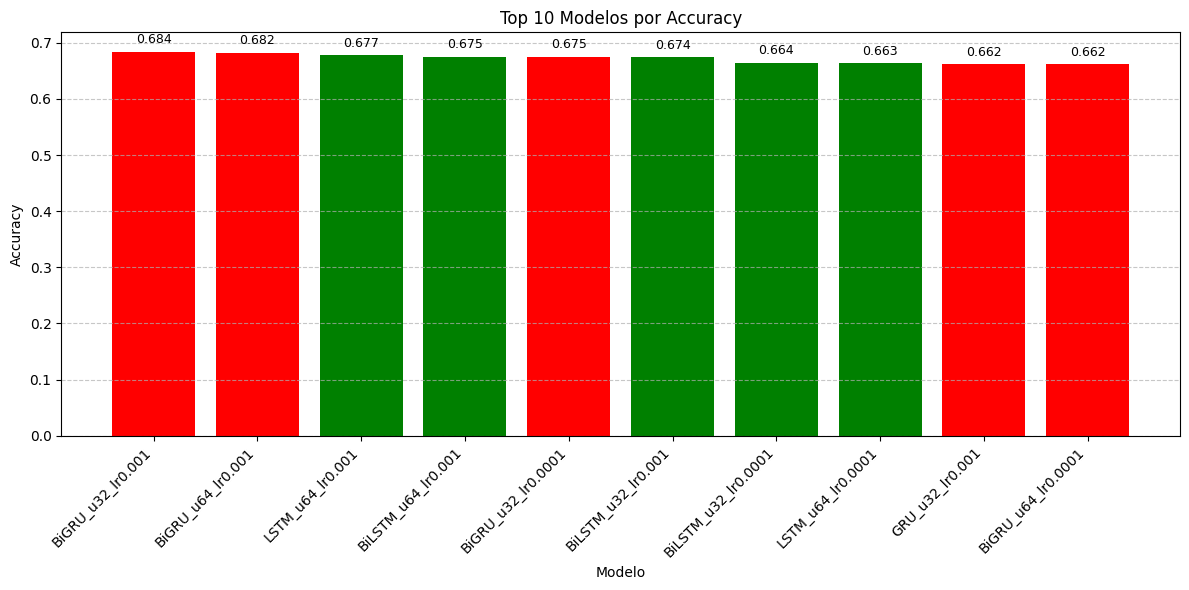

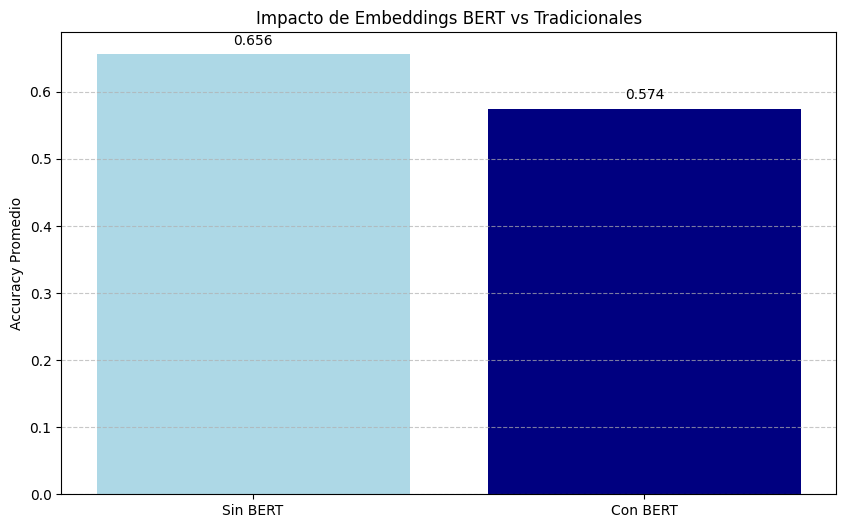

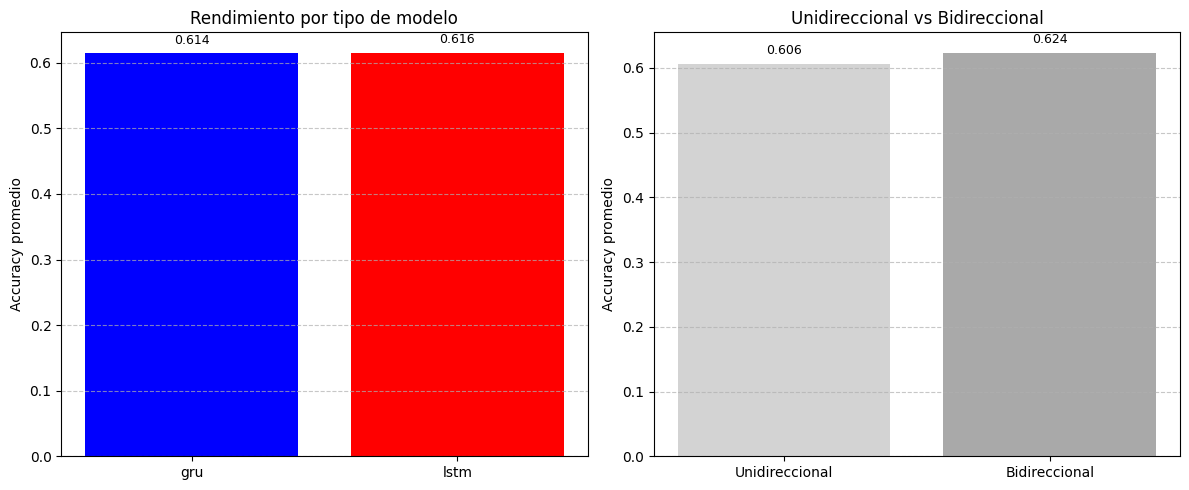


Mejor modelo: BiGRU_u32_lr0.001
Accuracy: 0.6845
F1-Score: 0.6840

Entrenando el mejor modelo con la configuraci√≥n √≥ptima...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 12ms/step - accuracy: 0.4720 - loss: 1.0367 - val_accuracy: 0.6770 - val_loss: 0.7485
Epoch 2/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.7370 - loss: 0.6386 - val_accuracy: 0.6635 - val_loss: 0.8688
Epoch 3/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 12ms/step - accuracy: 0.8825 - loss: 0.3350 - val_accuracy: 0.6550 - val_loss: 1.0876
Epoch 4/10
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.9415 - loss: 0.1733 - val_accuracy: 0.6585 - val_loss: 1.1880
63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step


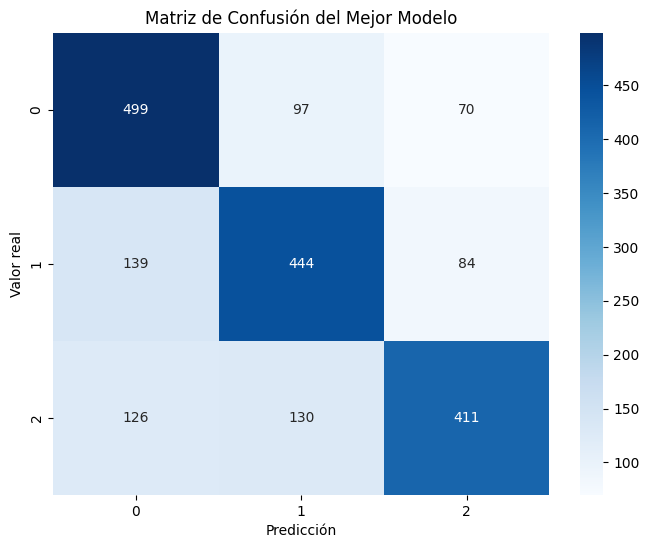


Reporte de clasificaci√≥n del mejor modelo:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       666
           1       0.66      0.67      0.66       667
           2       0.73      0.62      0.67       667

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000


Mejor modelo guardado como 'best_financial_sentiment_model_gru.keras'


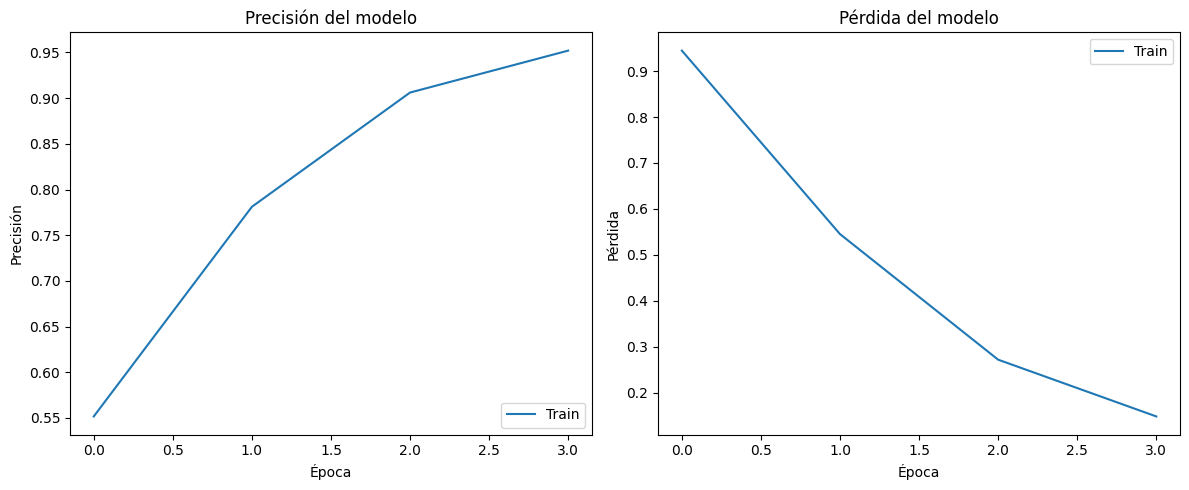


Proceso de grid search y entrenamiento completo.


In [6]:
# VISUALIZACIONES: Comparar rendimiento entre diferentes modelos


# 1. Gr√°fico de barras para los mejores modelos
plt.figure(figsize=(12, 6))
top_n = min(10, len(all_results_sorted))
top_models = results_df.head(top_n)['model_name'].tolist()
top_accs = results_df.head(top_n)['accuracy'].tolist()

# Colores basados en tipo de modelo
colors = []
for model_type in results_df.head(top_n)['model_type']:
    if model_type == 'simple_rnn':
        colors.append('blue')
    elif model_type == 'lstm':
        colors.append('green')
    else:  # gru
        colors.append('red')

# Gr√°fico
bars = plt.bar(top_models, top_accs, color=colors)
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Top 10 Modelos por Accuracy')
plt.xticks(rotation=45, ha='right')

# A√±adir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Comparar modelos con y sin BERT
plt.figure(figsize=(10, 6))
bert_avg = results_df[results_df['use_bert']]['accuracy'].mean()
no_bert_avg = results_df[~results_df['use_bert']]['accuracy'].mean()

bars = plt.bar(['Sin BERT', 'Con BERT'], [no_bert_avg, bert_avg], color=['lightblue', 'navy'])
plt.ylabel('Accuracy Promedio')
plt.title('Impacto de Embeddings BERT vs Tradicionales')

# A√±adir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Comparaci√≥n por tipo de modelo y bidireccionalidad
plt.figure(figsize=(12, 5))

# Subgr√°fico 1: Comparaci√≥n por tipo de modelo
plt.subplot(1, 2, 1)
model_type_perf = results_df.groupby('model_type')['accuracy'].mean()
bars1 = plt.bar(model_type_perf.index, model_type_perf.values, color=['blue', 'red', 'green'])
plt.title('Rendimiento por tipo de modelo')
plt.ylabel('Accuracy promedio')

# A√±adir valores sobre las barras
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subgr√°fico 2: Comparaci√≥n bidireccional vs unidireccional
plt.subplot(1, 2, 2)
bidir_perf = results_df.groupby('bidirectional')['accuracy'].mean()
bars2 = plt.bar(['Unidireccional', 'Bidireccional'], bidir_perf.values, color=['lightgray', 'darkgray'])
plt.title('Unidireccional vs Bidireccional')
plt.ylabel('Accuracy promedio')

# A√±adir valores sobre las barras
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Entrenar el mejor modelo con configuraci√≥n √≥ptima
best_result = all_results_sorted[0]
print(f"\nMejor modelo: {best_result['model_name']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"F1-Score: {best_result['f1_score']:.4f}")

# Crear y entrenar el mejor modelo
print("\nEntrenando el mejor modelo con la configuraci√≥n √≥ptima...")
best_model = create_rnn_model(
    model_type=best_result['model_type'],
    bidirectional=best_result['bidirectional'],
    units=best_result['units'],
    learning_rate=best_result['learning_rate'],
    dropout_rate=0.3,
    use_bert=best_result['use_bert']
)

# Early stopping con un poco m√°s de paciencia para el modelo final
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# Entrenar modelo final
history = best_model.fit(
    X_train_pad,
    y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,  # M√°s √©pocas para el modelo final
    batch_size=best_result['batch_size'],
    callbacks=[early_stopping],
    verbose=1
)

# Evaluar modelo final
y_pred_probs = best_model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(df['label'].unique()),
            yticklabels=sorted(df['label'].unique()))
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor real')
plt.title('Matriz de Confusi√≥n del Mejor Modelo')
plt.show()

# Reporte de clasificaci√≥n
print("\nReporte de clasificaci√≥n del mejor modelo:")
print(classification_report(y_test, y_pred))

# Guardar el mejor modelo
model_filename = f'best_financial_sentiment_model_{best_result["model_type"]}.keras'
best_model.save(model_filename)
print(f"\nMejor modelo guardado como '{model_filename}'")

# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Precisi√≥n del modelo')
plt.ylabel('Precisi√≥n')
plt.xlabel('√âpoca')
plt.legend(['Train'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('P√©rdida del modelo')
plt.ylabel('P√©rdida')
plt.xlabel('√âpoca')
plt.legend(['Train'], loc='upper right')

plt.tight_layout()
plt.show()

print("\nProceso de grid search y entrenamiento completo.")